# Sentiment Analysis

In [74]:
#downloading the vader lexicon from nltk

import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Arunaggiri
[nltk_data]     Pandian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# #importing sentimentintensityanaylzer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

In [43]:
import pandas as pd
df = pd.read_csv('Final_Cleaned_Twitter_Data.csv')

In [44]:
# # Dropping rows that have empty values as tweets after data cleaning because without dropping those I can't use it in
# # sentimentintensityanalyser() function, as it only accepts string input and empty values are of float type

# print('Number of Tweets before data cleaning:', df.shape[0])

# df.dropna(
#     axis=0,
#     how='any',
#     thresh=None,
#     subset=None,
#     inplace=True
# )
# print('Number of Tweets after data cleaning:', df.shape[0])
# #print(df['Cleaned_Tweet'][3])
# df.head(3)

In [45]:
# # Convert "Fee" from int to string
# # df = df.astype({'Cleaned_Tweet':'string'})
# # print(df['Cleaned_Tweet'].dtypes)
# # df['Cleaned_Tweet'][4]

# df["Cleaned_Tweet"]=df["Cleaned_Tweet"].values.astype('string')


In [46]:
# sentiment analysis and getting the polarity scores

from nltk.sentiment.vader import SentimentIntensityAnalyzer

tweetsWithSent = []
analyzer = SentimentIntensityAnalyzer()

for text in df['Cleaned_Tweet']:
    #print(type(text))
    #text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})

In [47]:
analyser = SentimentIntensityAnalyzer()
pol = lambda x: analyser.polarity_scores(x)

df['Cleaned_Tweet'].apply(pol)

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.126, 'neu': 0.529, 'pos': 0.345, 'co...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.102, 'neu': 0.717, 'pos': 0.181, 'co...
                               ...                        
18553    {'neg': 0.109, 'neu': 0.343, 'pos': 0.549, 'co...
18554    {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...
18555    {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...
18556    {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...
18557    {'neg': 0.112, 'neu': 0.597, 'pos': 0.291, 'co...
Name: Cleaned_Tweet, Length: 18558, dtype: object

In [48]:
df['scores'] = df['Cleaned_Tweet'].apply(pol)

In [49]:
df.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,User Name,User ID,Tweet,Image URL,Location,Cleaned_Tweet,scores
0,0,0,0,2022-12-06 23:57:15+00:00,FleursMackinac,1129803418376318978,@DebtCrisisOrg @POTUS Hey @POTUS how about you...,https://pbs.twimg.com/profile_images/112980375...,United States,hey right thing millions americans,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,1,1,2022-12-06 23:26:24+00:00,MystoryReright,1500480417086033920,"♦️Beware of the temptations♦️\n\nThe truth is,...",https://pbs.twimg.com/profile_images/150048167...,United States,beware temptations truth quite easy assume lef...,"{'neg': 0.126, 'neu': 0.529, 'pos': 0.345, 'co..."
2,2,2,2,2022-12-06 23:23:56+00:00,karenggolden,494178784,@joebiden knew exactly what he was doing offer...,https://pbs.twimg.com/profile_images/150925550...,United States,knew exactly offering,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [50]:
df['scores'][0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [54]:
# Creating a 'label' column to the dataframe that says the sentiment of the tweet based on the compound value 

def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05: 
        return "Negative"
    else:
        return "Neutral"
df['label'] = df['scores'].apply(lambda x: sentimentPredict(x))
#(df.head(3))
print(df.tail(3))

       Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                       Date  \
18555         20218          2678        2678  2022-09-15 02:22:17+00:00   
18556         20219          2679        2679  2022-09-15 00:42:02+00:00   
18557         20220          2680        2680  2022-09-15 00:10:55+00:00   

            User Name              User ID  \
18555       TrillDoom  1564762503011336192   
18556   LAFosterYouth  1021045159729901568   
18557  TurnOnThePower           1235968368   

                                                   Tweet  \
18555  All this #karaoke  got me #something #hungry ;...   
18556  Repost from @laco_dpss Are Student Loans weigh...   
18557  Good! Republicans deserve to get beat due to t...   

                                               Image URL       Location  \
18555  https://pbs.twimg.com/profile_images/159648319...  United States   
18556  https://pbs.twimg.com/profile_images/102219266...  United States   
18557  https://pbs.twimg.com/profile_images/

In [55]:
# count of positive, negative and neutral tweets

positive = df[df['label']== 'Positive']
print("Positive Tweets -", len(positive))
neutral = df[df['label']== 'Neutral']
print("Neutral Tweets  -", len(neutral))
negative = df[df['label']== 'Negative']
print("Negative Tweets -", len(negative))

Positive Tweets - 9557
Neutral Tweets  - 3235
Negative Tweets - 5766


In [70]:
# storing all positive, negative and neutral tweets in separate csv files just to be used for topic modeling

positive.to_csv('positive_tweets.csv')
negative.to_csv('negative_tweets.csv')
neutral.to_csv('neutral_tweets.csv')

print("Process completed")

Process completed


[Text(0.5, 1.0, 'Distribution of Tweets Across Each Sentiment')]

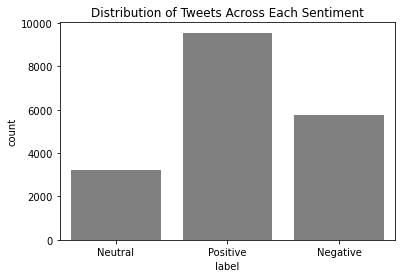

In [84]:
# visualization
import seaborn as sns
sns.countplot(df['label'], label='Count', color='grey').set(title="Distribution of Tweets Across Each Sentiment")
# sns.barplot(x, y, color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])

In [57]:
# #for positive tweets

# pos_sentences = positive['Cleaned_Tweet'].tolist()
# pos_sentences_as_one_string = " ".join(pos_sentences)
# plt.figure(figsize = (15,15))
# wordcloud = WordCloud(background_color='white',max_font_size = 50).generate(pos_sentences_as_one_string)
# plt.imshow(wordcloud)
# plt.title("Positive Tweets - Wordcloud")
# plt.axis('off')

In [58]:
# from wordcloud import WordCloud
# #for negative tweets
# neg_sentences = negative['Cleaned_Tweet'].tolist()
# neg_sentences_as_one_string = " ".join(neg_sentences)
# plt.figure(figsize = (15,15))
# wordcloud = WordCloud(background_color='black',max_font_size = 40).generate(neg_sentences_as_one_string)
# #plt.imshow(wordcloud, interpolation='bilinear')
# plt.imshow(wordcloud)
# plt.title("Negative Tweets - Wordcloud")
# plt.axis('off')

In [59]:
# #for positive tweets

# from wordcloud import STOPWORDS

# pos_sentences = positive['Cleaned_Tweet'].tolist()
# pos_sentences_as_one_string = " ".join(pos_sentences)
# plt.figure(figsize = (15,15))
# wordcloud = WordCloud(background_color='white',max_font_size = 256, max_words=500, random_state=42, 
#                       width=500, height=500).generate(pos_sentences_as_one_string)
# plt.imshow(wordcloud)
# plt.title("Positive Tweets - Wordcloud")
# # plt.axis('off')

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


(-0.5, 611.5, 455.5, -0.5)

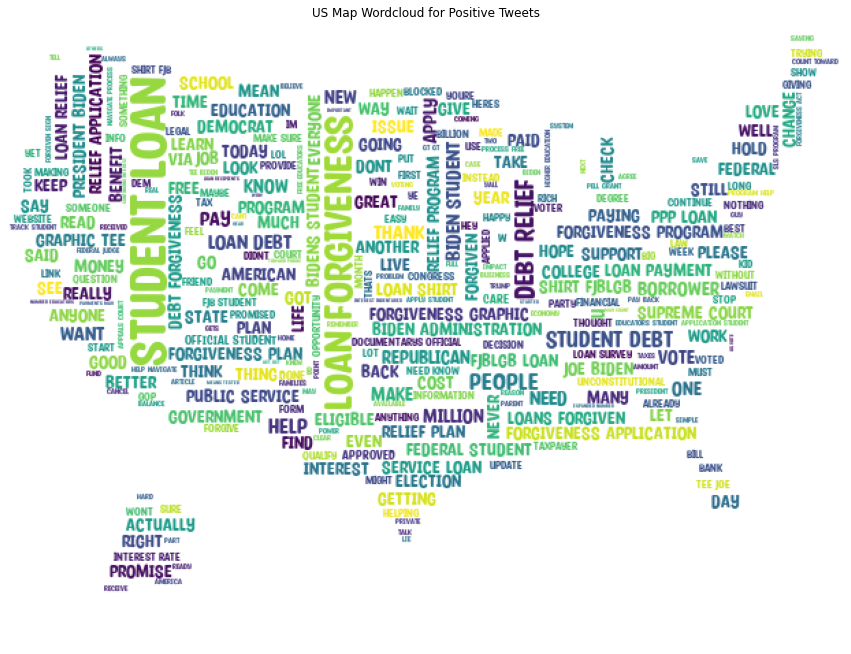

In [86]:
#for positive tweets

#font_path = r'C:\Users\Arunaggiri Pandian\AppData\Local\Microsoft\Windows\Fonts\Roboto-Black.ttf'
font_path = r'C:\Users\Arunaggiri Pandian\AppData\Local\Microsoft\Windows\Fonts\Party Confetti.ttf'

pos_sentences = positive['Cleaned_Tweet'].tolist()
pos_sentences_as_one_string = " ".join(pos_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',max_font_size = 40, mask=mask, 
                      font_path=font_path, height=700, width=500, max_words=1000).generate(pos_sentences_as_one_string)
plt.imshow(wordcloud)
plt.title("US Map Wordcloud for Positive Tweets")
plt.axis('off')

(-0.5, 611.5, 455.5, -0.5)

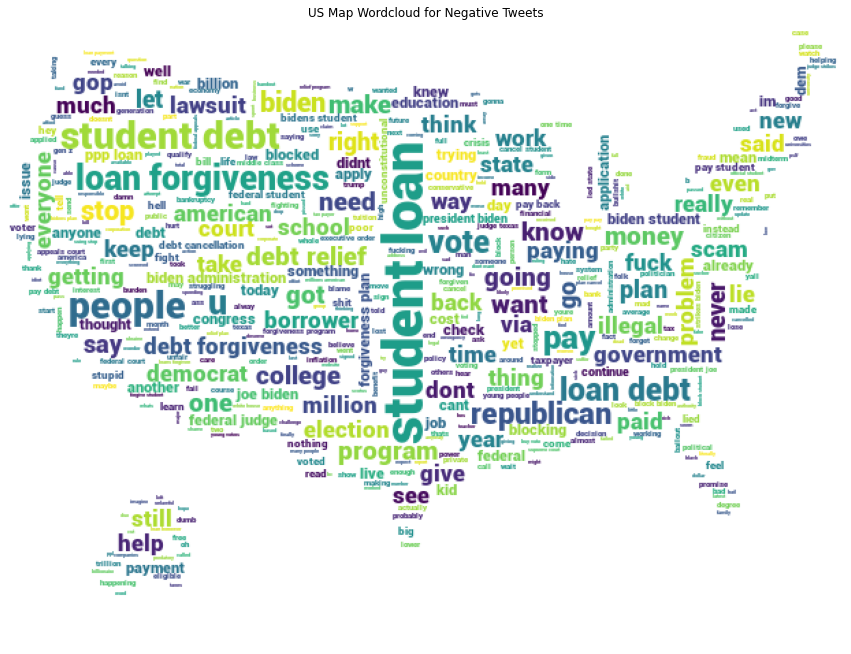

In [85]:
# using image color generator based on mask

from wordcloud import ImageColorGenerator

# for negative tweets

font_path = r'C:\Users\Arunaggiri Pandian\AppData\Local\Microsoft\Windows\Fonts\Roboto-Black.ttf'
neg_sentences = negative['Cleaned_Tweet'].tolist()
neg_sentences_as_one_string = " ".join(neg_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',max_font_size = 40, mask=mask, 
                      font_path=font_path, height=700, width=500, max_words=1000).generate(neg_sentences_as_one_string)
#plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud)
plt.title("US Map Wordcloud for Negative Tweets")
plt.axis('off')

(-0.5, 611.5, 455.5, -0.5)

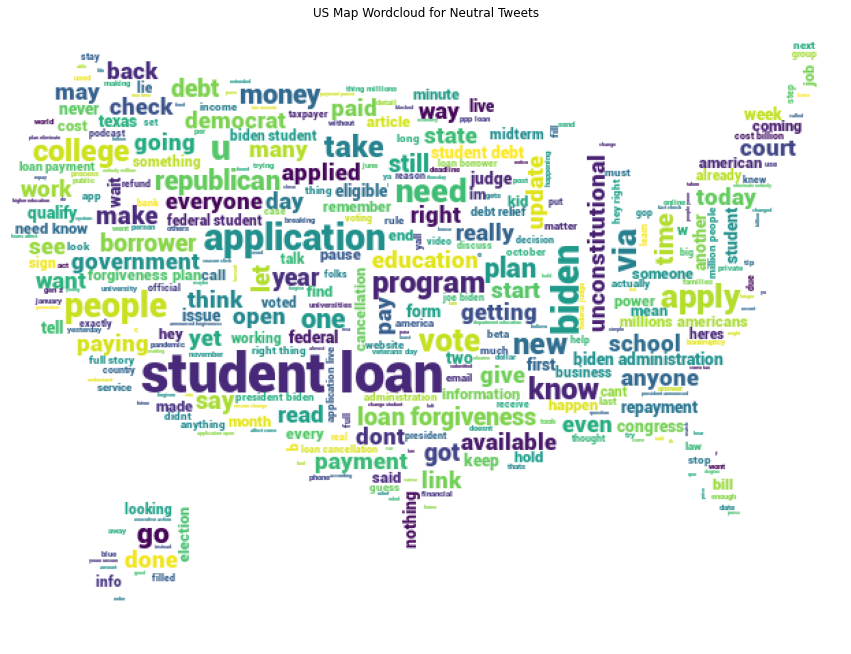

In [87]:
# for neutral tweets

font_path = r'C:\Users\Arunaggiri Pandian\AppData\Local\Microsoft\Windows\Fonts\Roboto-Black.ttf'
neu_sentences = neutral['Cleaned_Tweet'].tolist()
neu_sentences_as_one_string = " ".join(neu_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',max_font_size = 40, mask=mask, 
                      font_path=font_path, height=700, width=500, max_words=1000).generate(neu_sentences_as_one_string)
#plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud)
plt.title("US Map Wordcloud for Neutral Tweets")
plt.axis('off')

In [66]:
# count the number of tweets that were tagged as positive, negative and neutral

sentiment_counts = df.groupby(['label']).size()
print(sentiment_counts)

label
Negative    5766
Neutral     3235
Positive    9557
dtype: int64


Text(0.5, 1.0, 'Pie Chart of Tweet Classification')

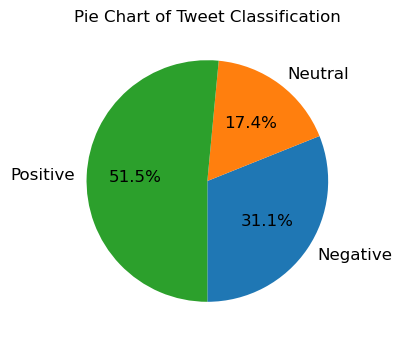

In [75]:
# A pie chart to visualize each sentiment in relative terms

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.title("Pie Chart of Tweet Classification")